<a href="https://colab.research.google.com/github/ravindrabharathi/Project1/blob/master/Session6/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification using CIFAR 10 dataset 

###Import necessary Modules 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


###create train and test data using cifar10 dataset in Keras 

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

###Plot some of the images in the dataset along with class label

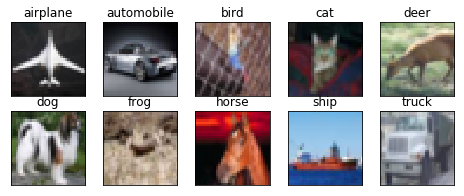

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

####define function to plot accuracy vs number of epoch and loss vs number of epochs 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

####function to return accuracy given the model, and test data 

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

###function to return max training accuracy given the model history 

In [0]:
def max_accuracy(model_info):
    train_acc=model_info.history['acc']
    max_train_acc=max(train_acc)
    return (max_train_acc * 100)

###Scale the input features to be within 0 and 1 
###convert the train and test labels to 10 class category format 

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

###initial model used to get base accuracy . This model uses Dense layers and lao doesn't use Dropouts optimally. It should ideally also use convolution blocks separated by transition blocks to reach the desired Receptive field . This will be corrected after we acquire the base accuracy to match 

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

### Declare the Image datagenerator for training and train for 100 epochs . 
### Plot accuracy vs number of epochs and loss vs number of epochs 
### Print Validation accuracy and Max Training accuracy 

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 12s 32ms/step - loss: 1.8334 - acc: 0.3030 - val_loss: 1.5082 - val_acc: 0.4493
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3369 - acc: 0.5112 - val_loss: 1.1111 - val_acc: 0.6011
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1233 - acc: 0.6015 - val_loss: 1.0357 - val_acc: 0.6266
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9805 - acc: 0.6578 - val_loss: 0.8231 - val_acc: 0.7160
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8748 - acc: 0.6974 - val_loss: 0.7992 - val_acc: 0.7255
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8000 - acc: 0.7247 - val_loss: 0.7685 - val_acc: 0.7451
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7351 - acc: 0.7464 - val_loss: 0.6887 - val_acc: 0.7667
Epoch 8/100
390/390 [==============================] - 9s 22m

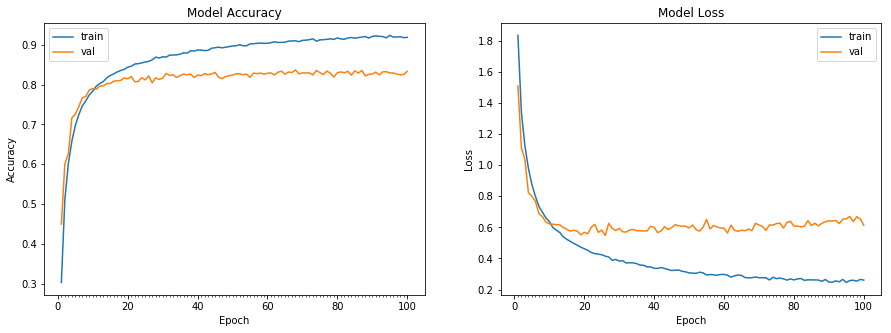


Accuracy on test data is: 83.32

Max Training Accuracy on training data is: 92.35


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train\n"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("\nAccuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
print ("\nMax Training Accuracy on training data is: %0.2f"%max_accuracy(model_info))

##Modify the Network 
###1. Remove Dense layers 
###2.Use Convolution Blocks followed by Transition Blocks 
###3.Make sure the required RF is reached 
###4.Place Dropouts at appropriate places and with appropriate dropout %
###5.place a 7x7 filter at the end instead of convolving all the way down to 1x1

####Print model summary and compile the model 

In [0]:
from keras.layers.convolutional import Conv2D
# Define the model                                                              #RF
model = Sequential()

model.add(Conv2D(48, 3, border_mode='same', input_shape=(32, 32, 3)))           #3
model.add(Activation('relu'))

#Conv block 1 

model.add(Conv2D(96, 3,border_mode='same'))                                     #5
model.add(Activation('relu'))

model.add(Conv2D(192, 3))                                                       #7
model.add(Activation('relu'))

#dropout after conv block1 
model.add(Dropout(0.25))


#Transition Block 1
model.add(Conv2D(48,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #14

#Conv Block 2
model.add(Conv2D(96, 3, border_mode='same'))                                    #16          
model.add(Activation('relu'))
model.add(Conv2D(192, 3,border_mode='same'))                                    #18
model.add(Activation('relu'))


#dropout after conv block2 
model.add(Dropout(0.25))

#Transition Block 2
model.add(Conv2D(48,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #36 - we have reached the image size here 

#final conv Block 

model.add(Conv2D(96, 3, border_mode='same'))                                    #38
model.add(Activation('relu'))
model.add(Conv2D(192, 3,border_mode='same'))                                    #40
model.add(Activation('relu'))

#dropout after final conv block
model.add(Dropout(0.25))

#Pointwise convolution to squash 192 channels to 10 output channels 
model.add(Conv2D(10,1))
model.add(Activation('relu'))

#last conv layer - No ReLU activation 
model.add(Conv2D(10,7))                                                         #47

#Flatten the output 
model.add(Flatten())

#Softmax activation to output likelihood values for classes 

model.add(Activation('softmax'))

#Print model summary 

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, 3, input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 192)       166080    
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 192)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 192)       0         
__________

###Define datagenerator and Train the model for 100 epochs 
###Plot accuracy vs number of epochs 
###Plot loss vs number of epochs 
###print validation accuracy
###print max training accuracy 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
390/390 [==============================] - 29s 76ms/step - loss: 1.7566 - acc: 0.3518 - val_loss: 1.4550 - val_acc: 0.4718
Epoch 2/100
390/390 [==============================] - 28s 73ms/step - loss: 1.3276 - acc: 0.5205 - val_loss: 1.2373 - val_acc: 0.5499
Epoch 3/100
390/390 [==============================] - 28s 71ms/step - loss: 1.1296 - acc: 0.5945 - val_loss: 1.0724 - val_acc: 0.6191
Epoch 4/100
390/390 [==============================] - 28s 71ms/step - loss: 0.9736 - acc: 0.6525 - val_loss: 0.9441 - val_acc: 0.6608
Epoch 5/100
390/390 [==============================] - 28s 71ms/step - loss: 0.8571 - acc: 0.6976 - val_loss: 0.8252 - val_acc: 0.7042
Epoch 6/100
390/390 [==============================] - 28s 71ms/step - loss: 0.7667 - acc: 0.7287 - val_loss: 0.7721 - val_acc: 0.7229
Epoch 7/100
390/390 [==============================] - 28s 71ms/step - loss: 0.6972 - acc: 0.7539 - val_loss: 0.7085 - val_acc: 0.7483
Epoch 8/100
390/390 [==============================] - 

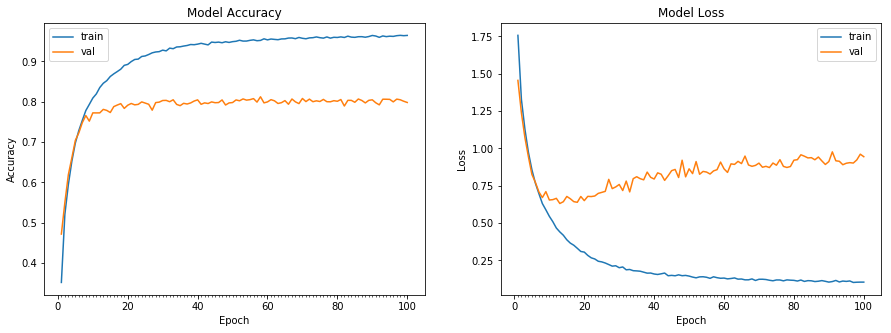


Accuracy on test data is: 79.83

Max Training Accuracy on training data is: 96.47


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train\n"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("\nAccuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
print ("\nMax Training Accuracy on training data is: %0.2f"%max_accuracy(model_info))

###We can see although the training accuracy is more than the base accuracy of the first model , there is still a tendency to overfit . We can optimize the model even further by using the following techniques 
####1.lesser number of kernels 32 ->64->128 instead of 48->96->192 sequence for the conv blocks
#### 2. addBatchNormalization. 
#### 3. Use Dropouts . Since we have reduced kernel numbers , use 10% dropout 
#### 4. Use Image augmentation of horizontal flip and a zoom range of 0.15 
#### 5. Use a higher learning rate to start with and decay the learning rate with a simple scheduler 

In [0]:
from keras.layers import BatchNormalization
# Define the model                                                              #RF
model = Sequential()

model.add(Conv2D(32, 3, border_mode='same', input_shape=(32, 32, 3)))           #3
model.add(Activation('relu'))

#Conv block 1 

model.add(Conv2D(64, 3,border_mode='same'))                                     #5
model.add(Activation('relu'))

model.add(Conv2D(128, 3))                                                       #7
model.add(Activation('relu'))

#dropout after conv block1 
model.add(Dropout(0.1))


#Transition Block 1
model.add(Conv2D(32,1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #14

#Conv Block 2
model.add(Conv2D(64, 3, border_mode='same'))                                    #16  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3,border_mode='same'))                                    #18
model.add(BatchNormalization())
model.add(Activation('relu'))


#dropout after conv block2 
model.add(Dropout(0.1))

#Transition Block 2
model.add(Conv2D(32,1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #36 - we have reached the image size here 

#final conv Block 

model.add(Conv2D(64, 3, border_mode='same'))                                    #38
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3,border_mode='same'))                                    #40
model.add(BatchNormalization())
model.add(Activation('relu'))

#dropout after final conv block
model.add(Dropout(0.1))

#Pointwise convolution to squash 128 channels to 10 output channels 
model.add(Conv2D(10,1))
model.add(BatchNormalization())
model.add(Activation('relu'))

#last conv layer - No ReLU activation, No Batch Normalization 
model.add(Conv2D(10,7))                                                         #47

#Flatten the output 
model.add(Flatten())

#Softmax activation to output likelihood values for classes 

model.add(Activation('softmax'))

#Print model summary 

model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 30, 128)       0         
__________

###Learning Rate Scheduler : We will add a custom learning rate scheduler that reduces the rate every 3rd epoch sugject to a min of 0.0005. We will also start with a slightly larger lr of 0.003 compared to default of 0.001 for Adam optimizer

In [0]:
# define a learning rate scheduler . We will use a simple scheduler that reduces the lr by 10% every 3 epochs subject to a minimum lr of 0.0005 
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if (epoch%3==0 and epoch):
    new_lr = max(0.9*lr,0.0005) 
  else:
    new_lr=lr
  
  return round(new_lr, 10)
  
 



In [0]:
#start with a higher lr of 0.003 
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

###Define datagenerator with horizontal flip set to True ,zoom range of 0.15
### Train the model for 100 epochs 
### Plot accuracy vs number of epochs 
### Plot loss vs number of epochs 
### print validation accuracy
### print max training accuracy 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
390/390 [==============================] - 25s 64ms/step - loss: 1.5292 - acc: 0.4429 - val_loss: 1.7260 - val_acc: 0.4010
Epoch 2/100
390/390 [==============================] - 23s 59ms/step - loss: 1.1605 - acc: 0.5869 - val_loss: 1.3965 - val_acc: 0.5224
Epoch 3/100
390/390 [==============================] - 23s 58ms/step - loss: 0.9677 - acc: 0.6564 - val_loss: 1.0297 - val_acc: 0.6470
Epoch 4/100
390/390 [==============================] - 22s 57ms/step - loss: 0.8447 - acc: 0.7012 - val_loss: 0.9174 - val_acc: 0.6898
Epoch 5/100
390/390 [==============================] - 22s 57ms/step - loss: 0.7639 - acc: 0.7308 - val_loss: 0.9012 - val_acc: 0.6937
Epoch 6/100
390/390 [==============================] - 22s 57ms/step - loss: 0.7150 - acc: 0.7517 - val_loss: 1.1402 - val_acc: 0.6397
Epoch 7/100
390/390 [==============================] - 22s 58ms/step - loss: 0.6692 - acc: 0.7672 - val_loss: 0.8840 - val_acc: 0.7030
Epoch 8/100
390/390 [==============================] - 

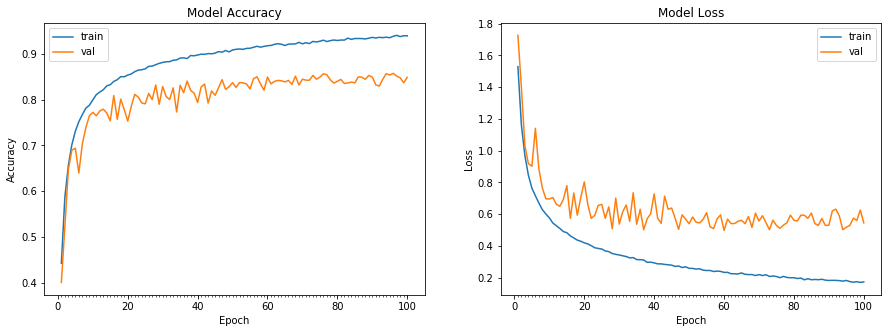


Accuracy on test data is: 84.84

Max Training Accuracy on training data is: 94.00


In [0]:
datagen = ImageDataGenerator(zoom_range=0.15, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train\n"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("\nAccuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
print ("\nMax Training Accuracy on training data is: %0.2f"%max_accuracy(model_info))

###We first made corrections in the model by removing Dense layers and making use of convolution blocks with increasing number of kernels followed by transition blocks .We further reduced the parameters by reducing number of kernels and also used Image augmentation ,BatchNormalization to reduce overfitting and optimize the model training . We used Dropouts of 10% after each convolution block. We brought down the parameters from 1.17 million to about 293 thousand . We also used a simple learning rate scheduler and a higher initial learning rate of 0.003 to help the model training converge faster. The revised model trained for 100 epochs and reached a max accuracy of 94.00 which is more than the base accuracy of 92.35. We can also see that the gap between trainng and validation accuracy has reduced and validation accuracy is at around 85%